# Monte Carlo Methods

This notebook contains all of the Monte Carlo algorithms used trhoughout this thesis.

In [1510]:
import pandas as pd
import math
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.integrate import quad
%matplotlib inline

## Example for Monte Carlo Integration

We are trying to estimate
$$
\int_0^1 [\cos(50x)+sin(20x)]^2 dx
$$
where: 
* $h(x)= [\cos(50x)+sin(20x)]^2$,
* $f(X)= 1, x \sim U(0,1)$.

In [1511]:
def MCI(h, f_samples, n):
    """Perform Monte Carlo Integration to estimate the expectation of H(X) using n samples drawn from f(X)

    Args:
        h (callable): The function h(x) to be integrated.
        f_samples (callable): n samples from the probability distribution f(X)
        n(int): # of samples
        
    Returns:
        estimate: estimate value of the expectation of h(X) using Monte Carlo Integration
    """
    
    values = h(f_samples)
    mu = np.average(values)
    error =  np.sqrt(np.sum((values - mu)**2))/n
    
    return mu, error

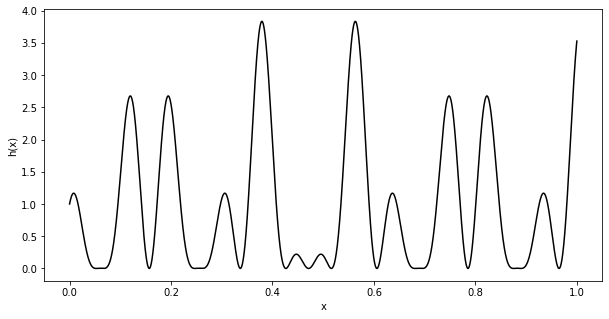

In [1602]:
#Define and chart target function
def h_MC(x):
    return (np.cos(50*x) + np.sin(20*x))**2

x = np.linspace(0,1,10000)


plt.figure(figsize=(10, 5))
plt.plot(x,h_MC(x),color='black' )
plt.xlabel('x')
plt.ylabel('h(x)')
plt.show()

In [1603]:
n_MCI = 10000
n_values_MCI = np.arange(2, n_MCI+1)
estimates_MCI = []
upper_bounds_MCI = []
lower_bounds_MCI = []
for k in n_values_MCI:
    f_MC = stats.uniform(0,1).rvs(k)
    mu_MCI, error_MCI = MCI(h_MC,f_MC, k)
    
    CI = 2*error_MCI
    upper_MCI = mu_MCI + CI
    lower_MCI = mu_MCI - CI
    
    estimates_MCI.append(mu_MCI)
    upper_bounds_MCI.append(upper_MCI)
    lower_bounds_MCI.append(lower_MCI)

Result of integration: 0.9652009360501453
Estimated error: 1.8542214725442152e-10
Average of MC approximations: 1.3793462073588438e-07


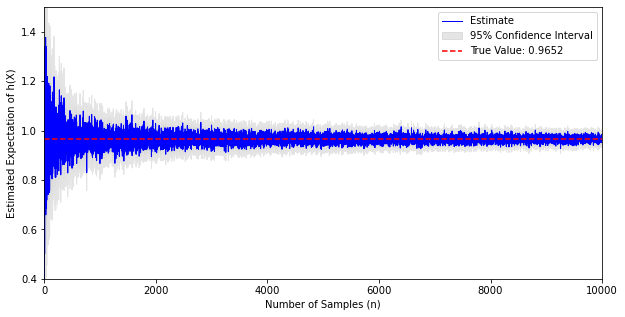

In [1606]:
#Calculate exact result and compare with MX approximation
result_MCI, error_MCI2= quad(h_MC, 0, 1)

print("Result of integration:", result_MCI)
print("Estimated error:", error_MCI2)
print("Average of MC approximations:",np.mean(estimates))


# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(n_values_MCI, estimates_MCI, label='Estimate', linewidth=1, color='blue')
plt.xlim(0,n_MCI)
plt.ylim(0.4,1.5)
plt.fill_between(n_values_MCI, lower_bounds_MCI, upper_bounds_MCI, color='grey', alpha=0.2, label='95% Confidence Interval')
plt.xlabel('Number of Samples (n)')
plt.ylabel('Estimated Expectation of h(X)')
plt.grid(False)

# Add horizontal line for the true value
plt.axhline(y=result_MCI, color='red', linestyle='--', label=f'True Value: {result_MCI:.4f}')
plt.legend()
plt.show()

## Example of Importance Sampling

We are trying to estimate 
$$10\int_0^{10} \frac{1}{10} e^{-2 |x-5|} dx$$
where:
* $h(x) = e^{-2 |x-5|}$,
* $f(x) = \frac{1}{10}$, $x \sim U(0,10)$
* $g(X) = \frac{1}{\sqrt{2\pi}} e^{-\frac{1}{2}(x-5)^2}$

In [1515]:
#Define and chart target function
def IS(h,f,g, g_samples, n):
    """Perform Importance Sampling to estimate the expectation of h(x)*f(x) using n samples drawn from g(X)

    Args:
        h(callable): The function h(x) to be integrated.
        f(callable): The function f(x) to calculate the importance weights
        g(callable): The function g(x) to calculate the importance weights
        g_samples (callable): n samples from the probability distribution g(X)
        n(int): number of samples
        
    Returns:
        estimate: estimate value of the expectation of h(X) using Monte Carlo Integration
    """
    
    weights = f(g_samples) / g(g_samples)
    values = weights * h(g_samples)    
    
    mu = np.average(values)
    error = np.sqrt(np.sum((values - mu)**2))/n
    
    return mu, error

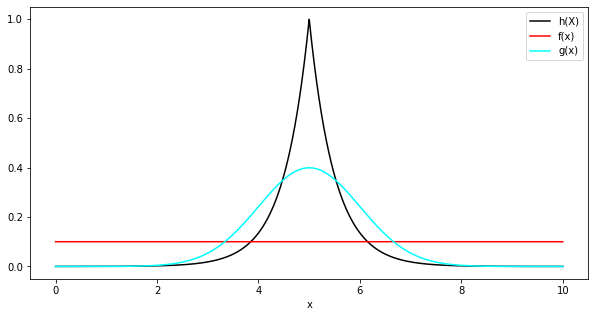

In [1516]:
#Define the functions
def h_IS(x):
    return np.exp(-2*np.abs(x-5))
def f_IS(x):
    return stats.uniform.pdf(x,loc=0,scale=10)

def g_IS(x):
    return stats.norm.pdf(x, loc=5, scale =1)

#Plot the functions
x = np.linspace(0,10,10000)

plt.figure(figsize=(10, 5))
plt.plot(x,h_IS(x),color='black', label = 'h(X)')
plt.plot(x,f_IS(x), color='red', label = 'f(x)')
plt.plot(x,g_IS(x), color='cyan', label='g(x)')
plt.xlim(-0.5,10.5)
plt.legend()
plt.xlabel('x')
plt.show()

In [1517]:
n_IS = 1000
n_values_IS = np.arange(2, n_IS+1)

estimates_MC = []
upper_bounds_MC = []
lower_bounds_MC = []
estimates_IS = []
upper_bounds_IS = []
lower_bounds_IS = []

for k in n_values_IS:
    #Calculate MC approximation
    f_IS_Samples = stats.uniform(0,10).rvs(k)
    mu_MC, error_MC = MCI(h_IS,f_IS_Samples,k)

    CI_MC = 2*error_MC
    upper_MC = mu_MC + CI_MC
    lower_MC = mu_MC - CI_MC
    
    estimates_MC.append(mu_MC)
    upper_bounds_MC.append(upper_MC)
    lower_bounds_MC.append(lower_MC)
    
    #Calculate IS approximation
    g_IS_samples = stats.norm(5,1).rvs(k)
    mu_IS, error_IS = IS(h_IS,f_IS,g_IS,g_IS_samples,k)
    
    CI_IS = 2*error_IS
    upper_IS = mu_IS + CI_IS
    lower_IS = mu_IS - CI_IS
    
    estimates_IS.append(mu_IS)
    upper_bounds_IS.append(upper_IS)
    lower_bounds_IS.append(lower_IS)
    

Result of integration: 0.09999546000702378
Estimated error: 2.842170943040401e-14
Average of MCI approximations: 0.10002381335866614
Average of IS approximations: 0.10002864949753525


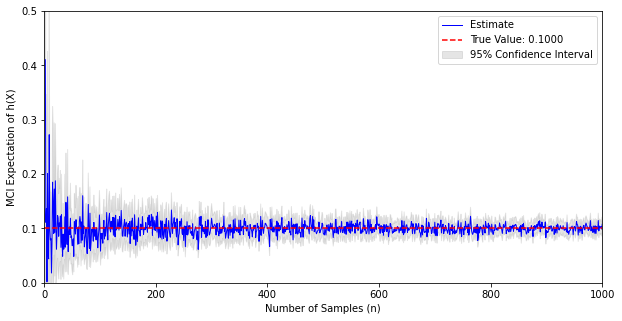

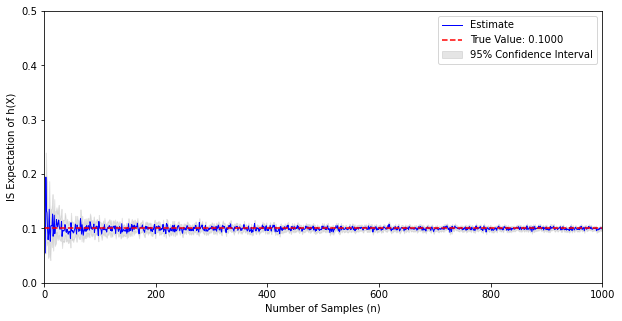

In [1518]:
#Calculate exact result and compare with MX approximation
result_IS, error_IS2 = quad(h_IS, 0, 10)

print("Result of integration:", result_IS/10)
print("Estimated error:", error_IS2)
print("Average of MCI approximations:",np.mean(estimates_MC))
print("Average of IS approximations:",np.mean(estimates_IS))


# Plot MCI results
plt.figure(figsize=(10, 5))
plt.plot(n_values_IS, estimates_MC, label='Estimate', linewidth=1, color='blue')
plt.axhline(y=result_IS/10, color='red', linestyle='--', label=f'True Value: {result_IS/10:.4f}')
plt.xlim(0,n_IS)
plt.ylim(0,0.5)
plt.fill_between(n_values_IS, lower_bounds_MC, upper_bounds_MC, color='grey', alpha=0.2, label='95% Confidence Interval')
plt.xlabel('Number of Samples (n)')
plt.ylabel('MCI Expectation of h(X)')
plt.grid(False)
plt.legend()


# Plot IS results
plt.figure(figsize=(10, 5))
plt.plot(n_values_IS, estimates_IS, label='Estimate', linewidth=1, color='blue')
plt.axhline(y=result_IS/10, color='red', linestyle='--', label=f'True Value: {result_IS/10:.4f}')
plt.xlim(0,n_IS)
plt.ylim(0,0.5)
plt.fill_between(n_values_IS, lower_bounds_IS, upper_bounds_IS, color='grey', alpha=0.2, label='95% Confidence Interval')
plt.xlabel('Number of Samples (n)')
plt.ylabel('IS Expectation of h(X)')
plt.grid(False)
plt.legend()

plt.show()

## Example of Self Normalized Importance Sampling

In [1718]:
#Define and chart target function
def SNIS(h,f,g, g_samples, n):
    """Perform Importance Sampling to estimate the expectation of h(x)*f(x) using n samples drawn from g(X)

    Args:
        h(callable): The function h(x) to be integrated.
        f(callable): The function f(x) to calculate the importance weights
        g(callable): The function g(x) to calculate the importance weights
        g_samples (callable): n samples from the probability distribution g(X)
        n(int): number of samples
        
    Returns:
        estimate: estimate value of the expectation of h(X) using Monte Carlo Integration
    """
    
    weights = f(g_samples) / g(g_samples)
    
    Z = weights.sum()
    normalized_w = weights / Z
    
    h_values = h(g_samples)
    
    values = normalized_w * h_values  
    
    mu = np.mean(values)
    
    aux = normalized_w**2 * (h_values - mu)**2
    error = np.sum(aux)
    
    ESS = 1 / (normalized_w**2).sum()
    
    return mu, error, ESS, Z/n

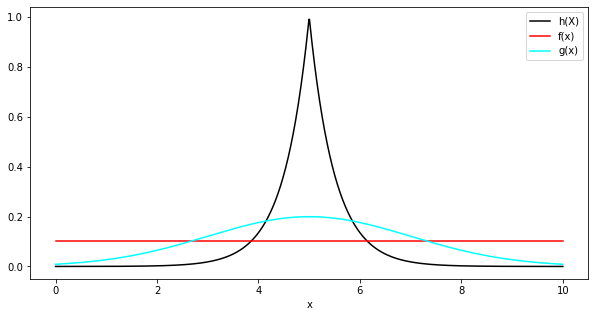

In [1715]:
#Define the functions

def h_SNIS(x):
    return np.exp(-2*np.abs(x-5))

def f_SNIS(x):
    return stats.uniform(0,10).pdf(x)

def g_SNIS(x):
    return stats.norm(5,2).pdf(x)


#Plot the functions
x = np.linspace(0,10,1000)

plt.figure(figsize=(10, 5))
plt.plot(x,h_SNIS(x),color='black', label = 'h(X)')
plt.plot(x,f_SNIS(x), color='red', label = 'f(x)')
plt.plot(x,g_SNIS(x), color='cyan', label='g(x)')
plt.legend()
plt.xlabel('x')
plt.show()

In [1719]:
n_SNIS = 1000
n_values_SNIS = np.arange(2, n_SNIS+1)


estimates_SNIS = []
upper_bounds_SNIS = []
lower_bounds_SNIS = []
ESS_SNIS = []
Z_SNIS = []

for k in n_values_SNIS:
    samples = stats.norm(5,2).rvs(k)
    mu, error, ESS, Z = SNIS(h_SNIS,f_SNIS,g_SNIS, samples, k)
    
    CI = 2*error
    upper_SNIS = mu + CI
    lower_SNIS = mu - CI
    
    estimates_SNIS.append(mu)
    upper_bounds_SNIS.append(lower_SNIS)
    lower_bounds_SNIS.append(upper_SNIS)
    ESS_SNIS.append(ESS)
    Z_SNIS.append(Z)



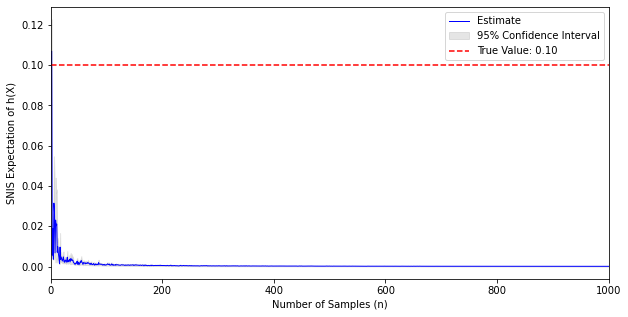

0.0006934261592463939


In [1724]:
# Plot SNIS results
plt.figure(figsize=(10, 5))
plt.plot(n_values_SNIS, estimates_SNIS, label='Estimate', linewidth=1, color='blue')
plt.xlim(0,n_SNIS)
plt.fill_between(n_values_SNIS, lower_bounds_SNIS, upper_bounds_SNIS, color='grey', alpha=0.2, label='95% Confidence Interval')
plt.axhline(y=result_IS/10, color='red', linestyle='--', label=f'True Value: {result_IS/10:.2f}')
plt.xlabel('Number of Samples (n)')
plt.ylabel('SNIS Expectation of h(X)')
plt.grid(False)
plt.legend()
plt.show()

print(np.mean(estimates_SNIS))


# Importance Sampling Resampling

Suppose we have the following probability distribution functions, $f \sim \chi^2(5)$ and $g \sim \exp(1)$, where $f$ is not the normalized distribution.

We cant to employ the Importance Sampling Resamplig algorythm to sample from $f$.


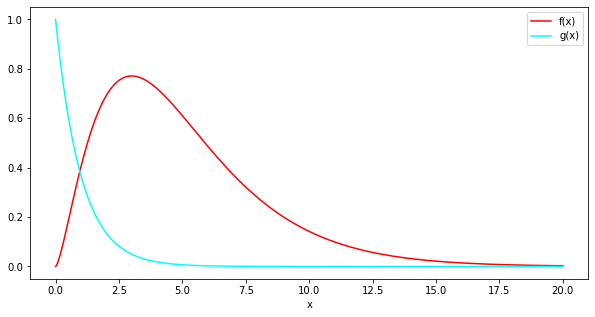

In [1694]:
#Defiine the functions:
def f(x):
    return 5*stats.chi2(5).pdf(x)

def g(x):
    return stats.expon().pdf(x)

#Plot the functions:
x = np.linspace(0,20,1000)

plt.figure(figsize=(10, 5))
plt.plot(x,f(x), color='red', label = 'f(x)')
plt.plot(x,g(x), color='cyan', label='g(x)')
plt.legend()
plt.xlabel('x')
plt.show()

In [1695]:
#SIR algorithm
n = 1000000

samples = stats.expon().rvs(n)

weights = f(samples) / g(samples)
Z = weights.sum(0)

norm_w = weights / Z

print(weights.mean())

offsprings = np.random.multinomial(n,norm_w)

indices = np.arange(len(norm_w))  
new_samples = np.repeat(samples[indices], offsprings)  # Repeat each index according to its count



5.167248009379078


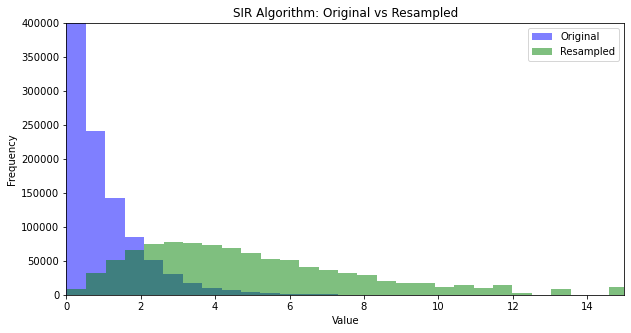

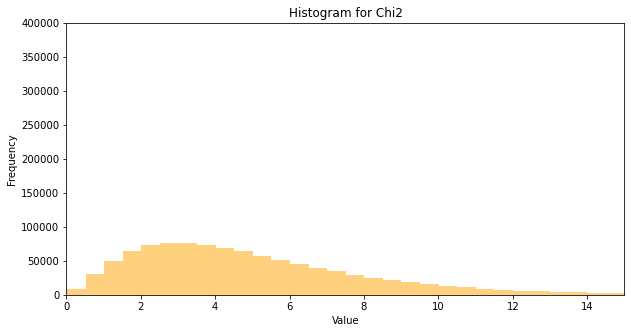

In [1711]:
plt.figure(figsize=(10, 5))

plt.hist(samples, bins=30, alpha=0.5, color='blue', label='Original')
plt.hist(new_samples, bins=30, alpha=0.5, color='green', label='Resampled')

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('SIR Algorithm: Original vs Resampled')
plt.legend()
plt.xlim(0,15)
plt.ylim(0,400000)

plt.show()

samples_f = stats.chi2(5).rvs(n)
plt.figure(figsize=(10, 5))
plt.hist(samples_f[samples_f<15], bins=30, alpha=0.5, color='orange')

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram for Chi2')
plt.xlim(0,15)
plt.ylim(0,400000)
plt.show()